## World Refugee Population Analysis 

By: Usman Shaikh

#### Source: 
http://data.un.org/Data.aspx?d=UNHCR&f=indID%3aType-Ref

#### Context: 
The prime purpose of this project is to identify how conflicts in Afghanistan and Syria have affected the world refugee populations in past two decades since their start in 2001 and 2011 respectively and to where the human population from these regions have relocated to. 

Refugees include individuals recognised under the 1951 Convention relating to the Status of Refugees; its 1967 Protocol; the 1969 OAU Convention Governing the Specific Aspects of Refugee Problems in Africa; those recognised in accordance with the UNHCR Statute; individuals granted complementary forms of protection; or those enjoying temporary protection. Since 2007, the refugee population also includes people in a refugee-like situation.

The number of people displaced due to conflict, war, persecution and human rights violations has increased significantly in recent years. UNHCR's statistics are a sad testimony of this global trend, and clearly show displacement over time. It is also evidence of the complexity of forced displacement today, with the number and different type of populations UNHCR is engaged with, increasing globally each year.


#### Questions:

1. Forecast a global trend in refugee population.
2. Identify countries of asylum with the highest no of refugees.
2. Identify countries of origin where most of the refugees are coming from.
3. Draw scatter plots for countries of asylum with highest no of refugees and observe any corelation.
4. Conduct detailed analysis on country level for countries with the highest number of refugees.
5. Identify other significant trends outside the Middle East and South Asia in world refugee population.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

## 1. UNHCR Master list for Refugees (1975 - 2016)

This comprises of the  United Nations High Commissioner for Refugees raw data available from 1975 to 2016 obtained from the UN. The data comprises of eight different variables which included two categorical variables 'Country of asylum' and the 'Country of origin' while the remaining six include quantitative variables 'Year', 'Refugees',  'Refugees assisted by UNHCR', 'Total refugees' and the 'Total refugees assisted by UNHCR'. 

In [4]:
UNHCR_master = pd.read_csv("C:/Users/ushai/Dropbox/Data Science/Thinkful/Thinkful/UNHCR Project/UNHCR data on refugees.csv")

In [5]:
# converts non numeric values to null
UNHCR_master['Year'] = pd.to_numeric(UNHCR_master['Year'], errors='coerce') 
UNHCR_master['Refugees'] = pd.to_numeric(UNHCR_master['Refugees'], errors='coerce') 
UNHCR_master['Refugees assisted by UNHCR'] = pd.to_numeric(UNHCR_master['Refugees assisted by UNHCR'] ,errors='coerce')

In [6]:
# drops null values
UNHCR_master = UNHCR_master.dropna()

## 2. UNHCR Master list for Refugees (1999 - 2016)
This is the cleaned version of the data with no null values or special charecters. After removing null values the number of years have been reduced from 1975 to 1999. For each of the countries the data is available from 1999 to 2016.Therefore the best way to analyze data in this case grouping it by year, the country of asylum and the country of origin.

In [7]:
UNHCR_master.head()

,Country of asylum,Country of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,Afghanistan,Iraq,2016.0,1.0,1.0,1.0,1.0
1,Afghanistan,Islamic Rep. of Iran,2016.0,33.0,33.0,33.0,33.0
2,Afghanistan,Pakistan,2016.0,59737.0,59737.0,59737.0,59737.0
3,Albania,China,2016.0,11.0,11.0,11.0,11.0
4,Albania,Dem. Rep. of the Congo,2016.0,3.0,3.0,3.0,3.0


## 3. Global Trend for the World Refugee population

1. The following information represents the total no of world refugee population on annual basis as reported by the UNHCR for past 19 years starting from 1999 to 2016. The analysis enables us to view a  trend for the world refugee population which appears to be consistantly on the rise after 2009 and which considerably rises after 2011 due to the Syrian conflict. 

2. However this is an overall analysis, a deeper analysis at country level can provide us more clues in relation to specific refugee populations we have set out to examine.

In [8]:
Total_Refugee_Population_by_year = UNHCR_master.groupby(['Year']).sum().reset_index()

In [9]:
Total_Refugee_Population_by_year.head()

,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,1999.0,8544231.0,6875583.0,8544231.0,6875583.0
1,2000.0,9384653.0,6853391.0,9384653.0,6853391.0
2,2001.0,8921621.0,6757909.0,8921621.0,6757909.0
3,2002.0,7301705.0,5661900.0,7301705.0,5661900.0
4,2003.0,6571922.0,5129481.0,6571922.0,5129481.0


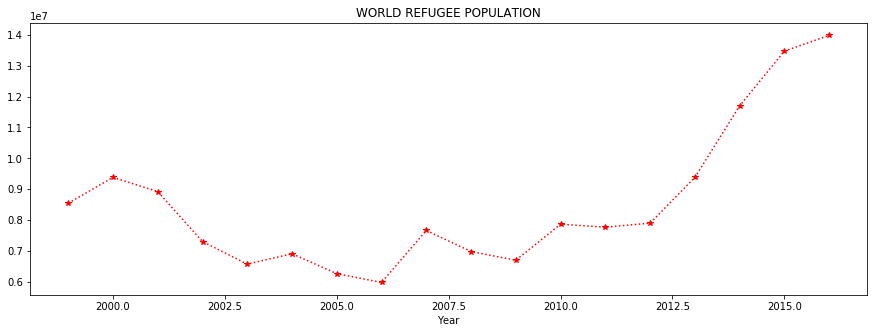

In [10]:
ax = Total_Refugee_Population_by_year.plot.line\
    (x='Year',y='Refugees',title='WORLD REFUGEE POPULATION'\
     ,figsize=(15, 5), linestyle=':', color='red'\
     ,rot=0,fontsize=10,legend='', marker='*')

##  4. Countries of Asylum with highest no of Refugees in 2016

1. To gain further insight we performed an analysis of countries which currently have the highest no of refugees. This provide us clues on geographical areas and countries which are highly active in human migration due to conflicts and war. 

2. Since data for each of the countries listed spans almost two decades, we will focus on the most recent years and identify  top five countries with the maximum no of refugees and which later can be investigated further.

3. The leading countries in this category are Turkey, Pakistan, Lebanon, Islamic Republic of Iran and Uganda.

In [53]:
UNHCR_data_2016 = UNHCR_master[(UNHCR_master['Year'] == 2016)]   

In [101]:
Countries_of_asylum_2016 = UNHCR_data_2016.groupby(['Country of asylum']).sum().nlargest(5, 'Refugees').reset_index()

In [102]:
Countries_of_asylum_2016

,Country of asylum,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,Turkey,104832.0,2869421.0,2869421.0,2869421.0,2869421.0
1,Pakistan,36288.0,1352560.0,1352560.0,1352560.0,1352560.0
2,Lebanon,54432.0,1012969.0,1012969.0,1012969.0,1012969.0
3,Islamic Rep. of Iran,10080.0,979435.0,979435.0,979435.0,979435.0
4,Uganda,48384.0,940835.0,940835.0,940835.0,940835.0


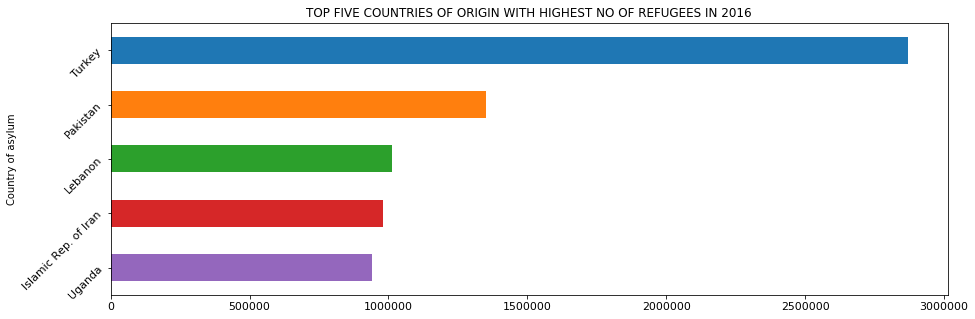

In [98]:
ax = Countries_of_asylum_2016.nlargest(5, 'Refugees').plot.barh(x='Country of asylum', y='Refugees'\
                              ,title='TOP FIVE COUNTRIES OF ORIGIN WITH HIGHEST NO OF REFUGEES IN 2016'\
                              ,figsize=(15, 5), rot=45, fontsize=11, legend='')

plt.gca().invert_yaxis()

## 5. Countries of Origin with the highest no of Refugees in 2016

The countries to which most of the refugees belonged in 2016 include Syrian Arab Republic, Afghanistan, South Sudan, Somalia and Sudan

In [95]:
Countries_of_origin_2016 = UNHCR_data_2016.groupby(['Country of origin']).sum().nlargest(5, 'Refugees').reset_index()

In [96]:
Countries_of_origin_2016

,Country of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,Syrian Arab Rep.,175392.0,4871391.0,4860679.0,4886460.0,4865723.0
1,Afghanistan,112896.0,2327957.0,2325043.0,2331400.0,2328486.0
2,South Sudan,54432.0,1436470.0,1395404.0,1436538.0,1395434.0
3,Somalia,135072.0,883744.0,732029.0,883744.0,732029.0
4,Sudan,133056.0,621576.0,609284.0,626180.0,610784.0


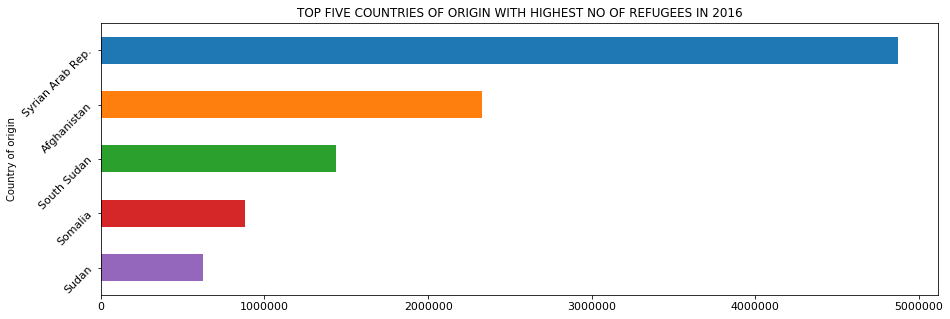

In [97]:
ax = Countries_of_origin_2016.nlargest(5, 'Refugees').plot.barh(x='Country of origin', y='Refugees'\
                              ,title='TOP FIVE COUNTRIES OF ORIGIN WITH HIGHEST NO OF REFUGEES IN 2016'\
                              ,figsize=(15, 5), rot=45, fontsize=11, legend='')

plt.gca().invert_yaxis()

## 6. SCATTER PLOTS 
### Top five countries of asylum with highest no of refugees

1. The scatter plots for the top five countries show corelation between the years and the number of refugees.
2. It clearly shows a positive correlation for Turkey, Lebanon and Uganda since 2010.



#### TURKEY

In [104]:
Turkey = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Turkey')]

In [105]:
Turkey_groupby_year = Turkey.groupby('Year').sum()

#### PAKISTAN

In [106]:
Pakistan = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Pakistan')]

In [107]:
Pakistan_groupby_year = Pakistan.groupby('Year').sum()

#### LEBANON

In [108]:
Lebanon = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Lebanon')]

In [109]:
Lebanon_groupby_year = Lebanon.groupby('Year').sum()

#### IRAN

In [110]:
Iran = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Islamic Rep. of Iran')]

In [111]:
Iran_groupby_year = Iran.groupby('Year').sum()

#### UGANDA

In [112]:
Uganda = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Uganda')]

In [113]:
Uganda_groupby_year = Uganda.groupby('Year').sum()

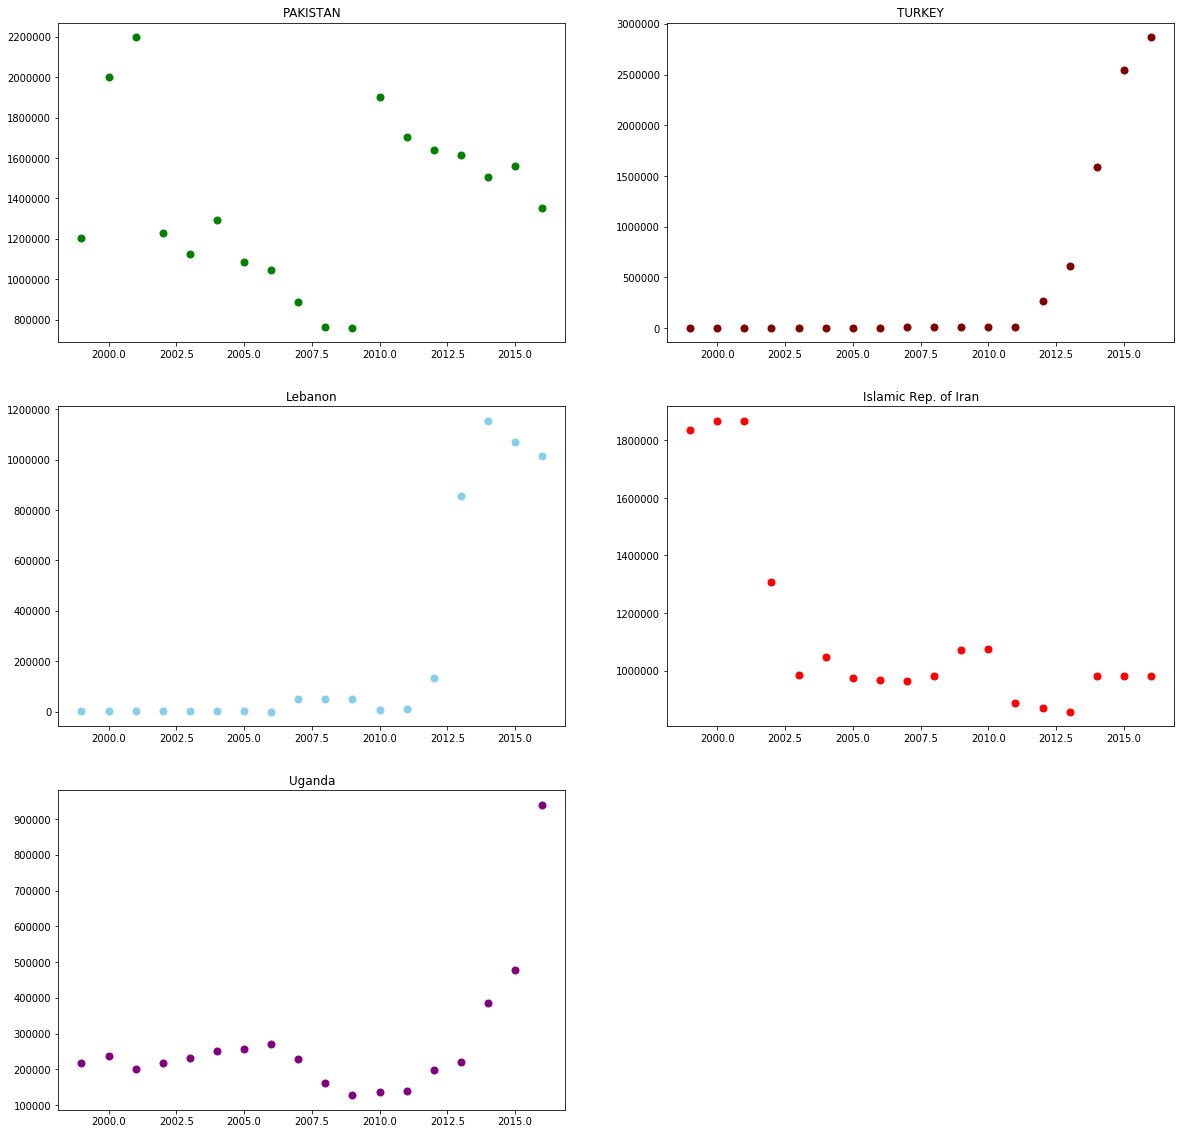

In [115]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.scatter(Pakistan_groupby_year.index, Pakistan_groupby_year.Refugees, color='green',s=7**2)
plt.title("PAKISTAN")

plt.subplot(3,2,2)
plt.scatter(Turkey_groupby_year.index, Turkey_groupby_year.Refugees, color='maroon',s=7**2)
plt.title("TURKEY")

plt.subplot(3,2,3)
plt.scatter(Lebanon_groupby_year.index, Lebanon_groupby_year.Refugees, color='skyblue', s=7**2)
plt.title("Lebanon")

plt.subplot(3,2,4)
plt.scatter(Iran_groupby_year.index, Iran_groupby_year.Refugees, color='red', s=7**2)
plt.title("Islamic Rep. of Iran")

plt.subplot(3,2,5)
plt.scatter(Uganda_groupby_year.index, Uganda_groupby_year.Refugees, color='purple', s=7**2 )
plt.title("Uganda")


plt.show()

## 7. COUNTRY ANALYSIS

1. Here we analyze each of the top five countries of asylum seperately and observe their trends in the past twenty years. 
2. The data is divided in to three categories each. The first category provides us an overall trend for the refugee population of that specific country over past twenty years followed by an analysis for year 2016, then an analysis of the country of origin with the highest number of refugees in that specific country. 
3. For example for 2016 Turkey tops the list for the highest number of refugees. Firstly we will look at an overall trend for Turkey for past twenty years, followed by an analysis for 2016 and then an analysis for Syrian refugees which accounts to an over 98% of the total refugee population in Turkey.

## 7.1. TURKEY
- Due to its geographic location and sharing a border with the Syrian Arab Republic the analysis indicate that there has been an abrupt increase in the number of refugees in Turkey since the Syrian war started in 2011.

In [120]:
Turkey = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Turkey')]

In [121]:
Turkey_by_year = Turkey.groupby('Year').sum()

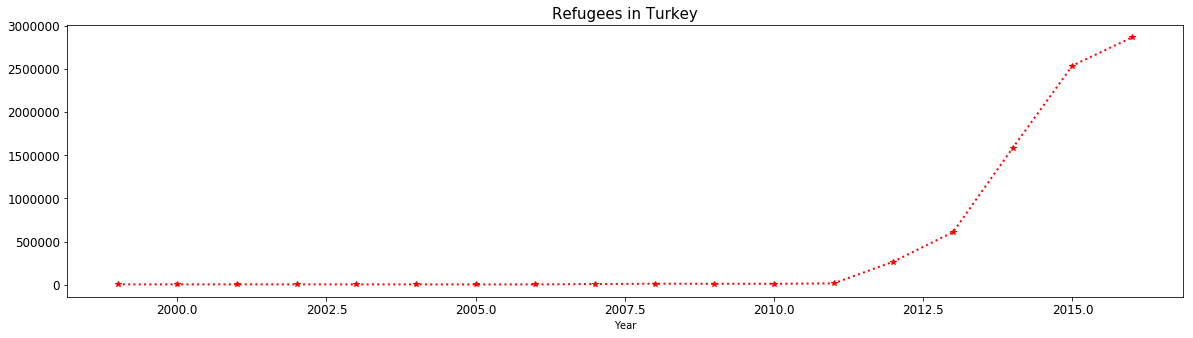

In [122]:
plt.figure(figsize=(20, 5))
Turkey_by_year['Refugees'].plot.line(color='red', marker='*', linestyle=':',fontsize = 12,linewidth=2, markersize=6)
plt.title('Refugees in Turkey',fontsize = 15)
plt.show()

### 7.1.1. Refugees in Turkey (2016)

- The highest number of refugees in Turkey for year 2016 belong to the Syrian Arab Republic, followed by Iraq, Iran, Afghanistan and Somalia.


In [66]:
Turkey_Refugees_2016 = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Turkey') 
                             & (UNHCR_master['Year'] == 2016) 
                             & (UNHCR_master['Refugees'] > 1)] 

In [68]:
Turkey_Refugees_2016['Refugees'].sum()

2869414.0

In [53]:
Turkey_Refugees_2016.sort_values('Refugees', ascending=False).reset_index(drop=True).head(5)

,Country of asylum,Country of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,Turkey,Syrian Arab Rep.,2016.0,2823987.0,2823987.0,2823987.0,2823987.0
1,Turkey,Iraq,2016.0,30398.0,30398.0,30398.0,30398.0
2,Turkey,Islamic Rep. of Iran,2016.0,6966.0,6966.0,6966.0,6966.0
3,Turkey,Afghanistan,2016.0,3423.0,3423.0,3423.0,3423.0
4,Turkey,Somalia,2016.0,2239.0,2239.0,2239.0,2239.0


<span style="color:blue"> *The above data for Turkey shows that Syrian refugees make up more than 98% of the total refugee population in 2016.*</span>

### 7.1.2. Syrian refugees in Turkey
- The analysis indicate that Syrian Refugees are the main driver of rising trend for global Refugee population in Turkey.

In [110]:
Syrian_refugees_in_Turkey = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Turkey') 
                                    & (UNHCR_master['Country of origin'] == 'Syrian Arab Rep.')]

In [111]:
Syrian_refugees_in_Turkey_by_year = Syrian_refugees_in_Turkey.groupby('Year').sum()

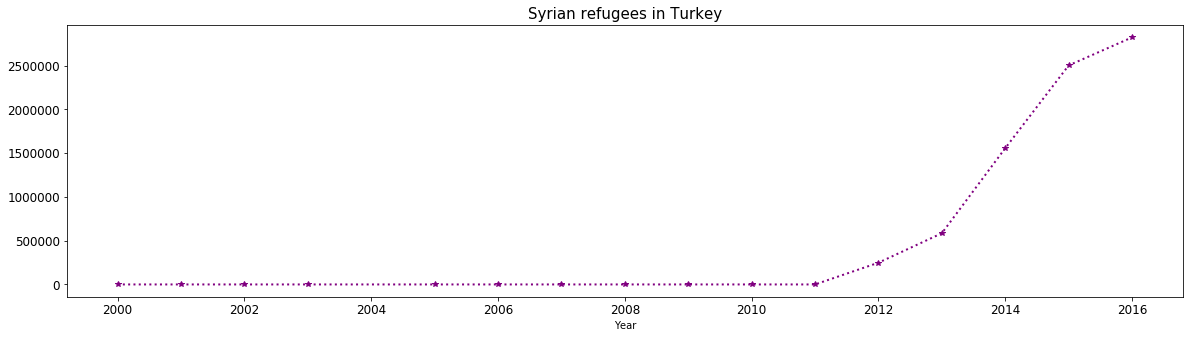

In [112]:
plt.figure(figsize=(20, 5))
Syrian_refugees_in_Turkey_by_year['Refugees'].plot.line (color='purple',marker ='*', linestyle=':', fontsize=12,\
                                                         linewidth=2, markersize=6)
plt.title('Syrian refugees in Turkey', fontsize=15)
plt.show()

## 7.2. PAKISTAN
- Due to its geographic location and sharing a border with Afghanistan the analysis indicate that there has been a constant decrease in Afghan refugees in Pakistan from 2002 to 2008 mainly because of the the Government of Pakistans efforts to properly register Afghan refugees and send them back to their homeland. However we see a sudden rise in 2009 due to deteriorating security situation in Afghanistan and then decrease from 2010 onwards indicating efforts by Pakistani government to keep the intake to refugees from Afghanistan limited.

In [32]:
Pakistan = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Pakistan')]

In [33]:
Pakistan_by_year = Pakistan.groupby('Year').sum()

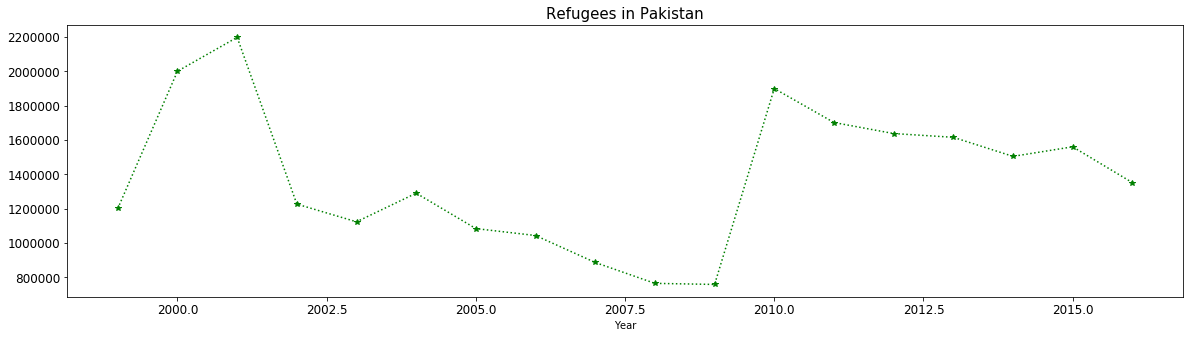

In [34]:
plt.figure(figsize=(20, 5))
Pakistan_by_year['Refugees'].plot.line(color='green', marker='*', linestyle=':',fontsize=12)
plt.title('Refugees in Pakistan', fontsize=15)
plt.show()

### 7.2.1. Refugees in Pakistan (2016)
- The highest number of refugees in Pakistan for year 2016 belong to Afghanistan, followed by Somalia, Iran, Yemen and Myanmar.

In [35]:
Pakistan_Refugees_2016 = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Pakistan') 
                             & (UNHCR_master['Year'] == 2016) 
                             & (UNHCR_master['Refugees'] > 1)] 

In [36]:
Pakistan_Refugees_2016.sort_values('Refugees', ascending=False).reset_index().head(5)

,index,Country of asylum,Country of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,3550,Pakistan,Afghanistan,2016.0,1352160.0,1352160.0,1352160.0,1352160.0
1,3561,Pakistan,Somalia,2016.0,214.0,214.0,214.0,214.0
2,3557,Pakistan,Islamic Rep. of Iran,2016.0,49.0,49.0,49.0,49.0
3,3567,Pakistan,Yemen,2016.0,24.0,24.0,24.0,24.0
4,3558,Pakistan,Myanmar,2016.0,23.0,23.0,23.0,23.0


<span style="color:blue"> *The above data for Pakistan shows that Afghan refugees make up more than 99% of the refugee population in 2016.*</span>


### 7.2.2. Afghan refugees in Pakistan
- The analysis indicate that Afghan Refugees are the main driver of trend for global Refugee population in Pakistan.

In [116]:
Afghan_refugees_in_PAK = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Pakistan') 
                                    & (UNHCR_master['Country of origin'] == 'Afghanistan')]

In [117]:
Afghan_refugees_in_PAK_by_year = Afghan_refugees_in_PAK.groupby('Year').sum()

In [118]:
Afghan_refugees_in_PAK_by_year.reset_index().head(5)

,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,1999.0,1200000.0,1200000.0,1200000.0,1200000.0
1,2000.0,2000000.0,1200000.0,2000000.0,1200000.0
2,2001.0,2197821.0,1509034.0,2197821.0,1509034.0
3,2002.0,1226569.0,1226569.0,1226569.0,1226569.0
4,2003.0,1123647.0,1123647.0,1123647.0,1123647.0


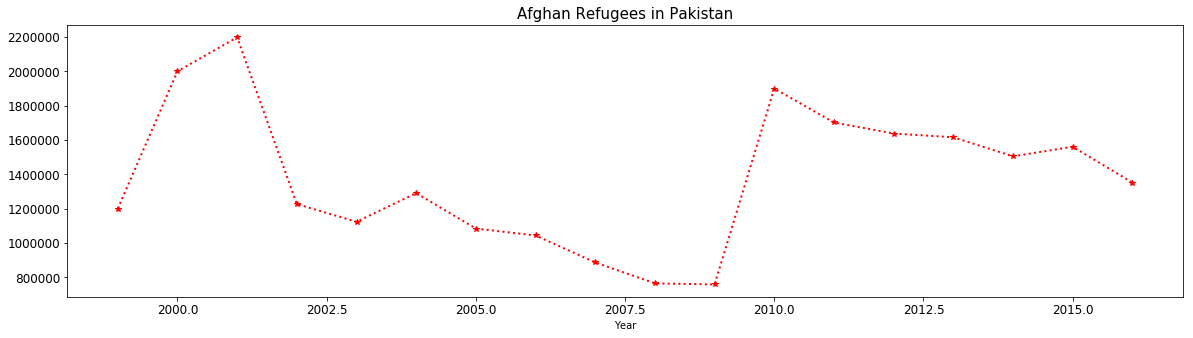

In [119]:
plt.figure(figsize=(20, 5))
Afghan_refugees_in_PAK_by_year['Refugees'].plot.line (color='red',marker ='*', linestyle=':',fontsize=12,\
                                                     linewidth=2, markersize=6)
plt.title('Afghan Refugees in Pakistan', fontsize=15)
plt.show()

## 7.3. ISLAMIC REP OF IRAN
- The analysis for Iran suggest that the Iranian Government has been trying to limit the global refugee population in Iran since 2001, majority of which comprise of the Afghan refugees as Iran shares land border with Afghanistan.

In [126]:
Iran = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Islamic Rep. of Iran')]

In [127]:
Iran_by_year = Iran.groupby('Year').sum()

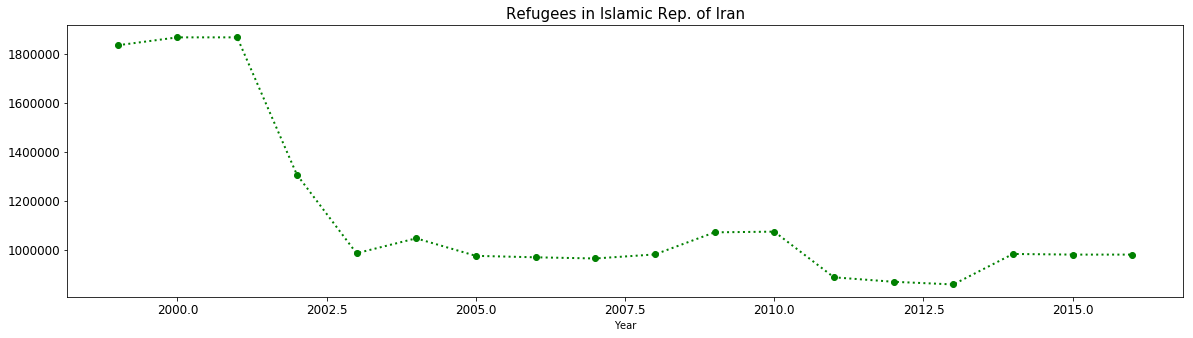

In [128]:
plt.figure(figsize=(20, 5))
Iran_by_year['Refugees'].plot.line(color='green', marker='o', linestyle=':',fontsize=12, linewidth=2, markersize=6)
plt.title('Refugees in Islamic Rep. of Iran', fontsize=15)
plt.show()

### 7.3.1. Refugees in Islamic Rep. of Iran (2016)
- The highest number of refugees in Iran for year 2016 belong to Afghanistan, followed by Iraq, Pakistan, Kuwait and Uzbekistan.

In [44]:
Iran_Refugees_2016 = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Islamic Rep. of Iran') 
                             & (UNHCR_master['Year'] == 2016) 
                             & (UNHCR_master['Refugees'] > 1)] 

In [45]:
Iran_Refugees_2016.sort_values('Refugees', ascending=False).reset_index(drop=True).head(5)

,Country of asylum,Country of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,Islamic Rep. of Iran,Afghanistan,2016.0,951142.0,951142.0,951142.0,951142.0
1,Islamic Rep. of Iran,Iraq,2016.0,28268.0,28268.0,28268.0,28268.0
2,Islamic Rep. of Iran,Pakistan,2016.0,10.0,10.0,10.0,10.0
3,Islamic Rep. of Iran,Kuwait,2016.0,8.0,8.0,8.0,8.0
4,Islamic Rep. of Iran,Uzbekistan,2016.0,7.0,7.0,7.0,7.0


<span style="color:blue"> *The above data for Islamic Rep. of Iran shows that Afghan refugees make up more than 97% of the refugee population in 2016.*</span>

### 7.3.2. Afghan Refugees in Islamic Rep. of Iran
- The analysis indicate that Afghan Refugees are the main driver of trend for global Refugee population in Iran.

In [117]:
Afghan_refugees_in_Iran = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Islamic Rep. of Iran') 
                                    & (UNHCR_master['Country of origin'] == 'Afghanistan')]

In [118]:
Afghan_refugees_in_Iran_by_year = Afghan_refugees_in_Iran.groupby('Year').sum()

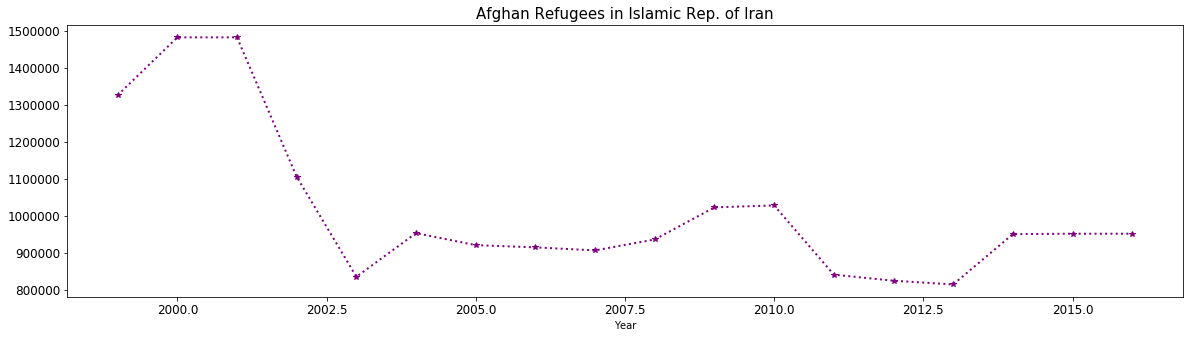

In [120]:
plt.figure(figsize=(20, 5))
Afghan_refugees_in_Iran_by_year['Refugees'].plot.line(color='purple',marker ='*', linestyle=':',fontsize=12,\
                                                     linewidth=2, markersize=6)
plt.title('Afghan Refugees in Islamic Rep. of Iran', fontsize=15)
plt.show()

## Lebanon
- Due to its geographic location and sharing a border with the Syrian Arab Republic the analysis indicate that there has been an abrupt increase in the number of refugees in Turkey since the Syrian war started in 2011.

In [51]:
Lebanon = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Lebanon')]

In [53]:
Lebanon_by_year = Lebanon.groupby('Year').sum()

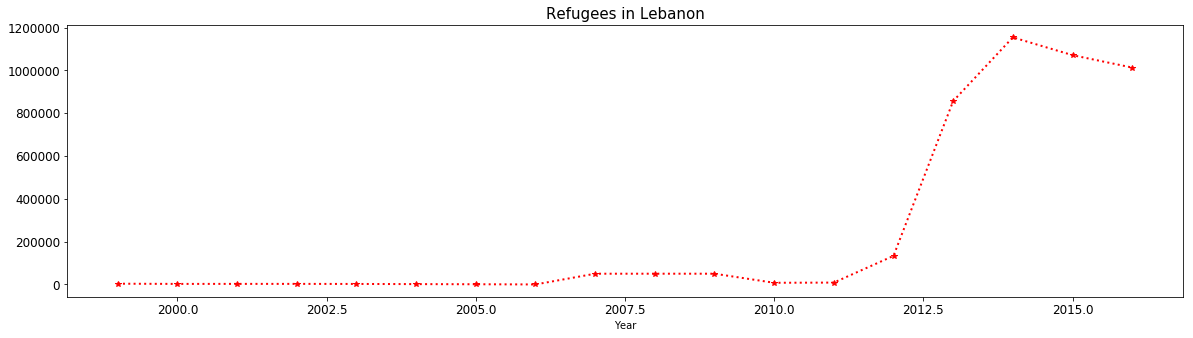

In [108]:
plt.figure(figsize=(20, 5))
Lebanon_by_year['Refugees'].plot.line(color='red', marker='*', linestyle=':',fontsize = 12,linewidth=2, markersize=6)
plt.title('Refugees in Lebanon',fontsize = 15)
plt.show()

### 7.4.1. Refugees in Lebanon (2016)
- The highest number of refugees in Turkey for year 2016 belong to the Syrian Arab Republic, followed by Iraq, Iran, Afghanistan and Somalia

In [57]:
Lebanon_Refugees_2016 = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Lebanon') 
                             & (UNHCR_master['Year'] == 2016) 
                             & (UNHCR_master['Refugees'] > 1)] 

In [58]:
Lebanon_Refugees_2016.sort_values('Refugees', ascending=False).reset_index(drop=True).head(5)

,Country of asylum,Country of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,Lebanon,Syrian Arab Rep.,2016.0,1005503.0,1005503.0,1005503.0,1005503.0
1,Lebanon,Iraq,2016.0,6454.0,6454.0,6454.0,6454.0
2,Lebanon,Sudan,2016.0,695.0,695.0,695.0,695.0
3,Lebanon,South Sudan,2016.0,50.0,50.0,50.0,50.0
4,Lebanon,Egypt,2016.0,35.0,35.0,35.0,35.0


### 7.4.2. Syrian refugees in Lebanon
- The analysis indicate that Syrian Refugees are the main driver of rising trend for global Refugee population in Turkey.

In [60]:
Syrian_refugees_in_Lebanon = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Lebanon') 
                                    & (UNHCR_master['Country of origin'] == 'Syrian Arab Rep.')]

In [61]:
Syrian_refugees_in_Lebanon_by_year = Syrian_refugees_in_Lebanon.groupby('Year').sum()

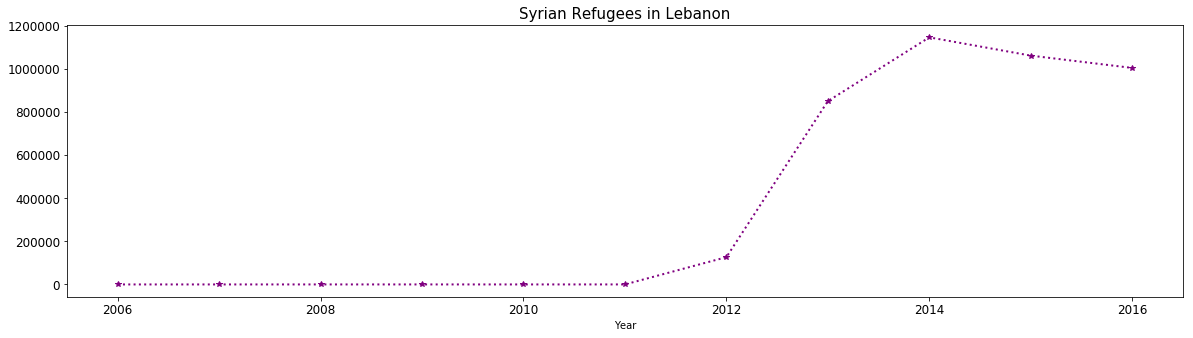

In [107]:
plt.figure(figsize=(20, 5))
Syrian_refugees_in_Lebanon_by_year['Refugees'].plot.line (color='purple',marker ='*', linestyle=':', fontsize=12,
                                                         linewidth=2, markersize=6)
plt.title('Syrian Refugees in Lebanon', fontsize=15)
plt.show()

##  UGANDA
- The analysis for Uganda indicates that due to the Sudanese conflict there has been a dramatic rise in refugee population in Uganda since 2011. 
- The main reason of refugee influx in to Uganda has been due to the South Sudan’s civil war of 2013.

In [123]:
Uganda = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Uganda')]

In [124]:
Uganda_by_year = Uganda.groupby('Year').sum()

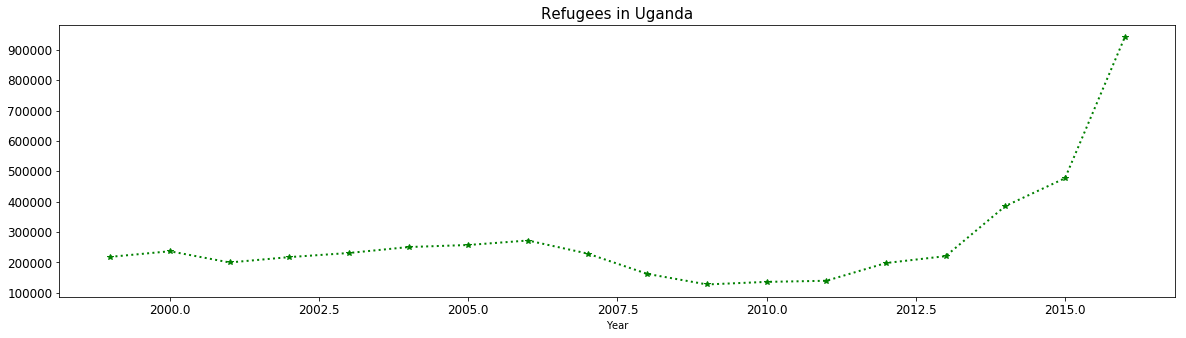

In [125]:
plt.figure(figsize=(20, 5))
Uganda_by_year['Refugees'].plot.line(color='green', marker='*', linestyle=':',fontsize = 12, linewidth=2, markersize=6)
plt.title('Refugees in Uganda',fontsize = 15)
plt.show()

### 7.5.1. Refugees in Uganda (2016)
- The highest number of refugees in Uganda for year 2016 belong to South Sudan, followed by Dem.Rep of the Congo, Burundi, Somalia and Rwanda.

In [126]:
Uganda_Refugees_2016 = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Uganda') 
                             & (UNHCR_master['Year'] == 2016) 
                             & (UNHCR_master['Refugees'] > 1)] 

In [127]:
Uganda_Refugees_2016.sort_values('Refugees', ascending=False).reset_index(drop=True).head(5)

,Country of asylum,Country of origin,Year,Refugees,Refugees assisted by UNHCR,Total refugees,Total refugees assisted by UNHCR
0,Uganda,South Sudan,2016.0,639007.0,639007.0,639007.0,639007.0
1,Uganda,Dem. Rep. of the Congo,2016.0,205363.0,205363.0,205363.0,205363.0
2,Uganda,Burundi,2016.0,41012.0,41012.0,41012.0,41012.0
3,Uganda,Somalia,2016.0,30689.0,30689.0,30689.0,30689.0
4,Uganda,Rwanda,2016.0,15231.0,15231.0,15231.0,15231.0


### 7.5.2. South Sudanese refugees in Uganda
- The analysis indicate that South Sudanese Refugees are the main driver of rising trend for global Refugee population in Uganda since South Sudan’s civil war in 2013.

In [128]:
South_Sudanese_refugees_in_Uganda = UNHCR_master[(UNHCR_master['Country of asylum'] == 'Uganda') 
                                    & (UNHCR_master['Country of origin'] == 'South Sudan')]

In [130]:
South_Sudanese_refugees_in_Uganda_by_year = South_Sudanese_refugees_in_Uganda.groupby('Year').sum()

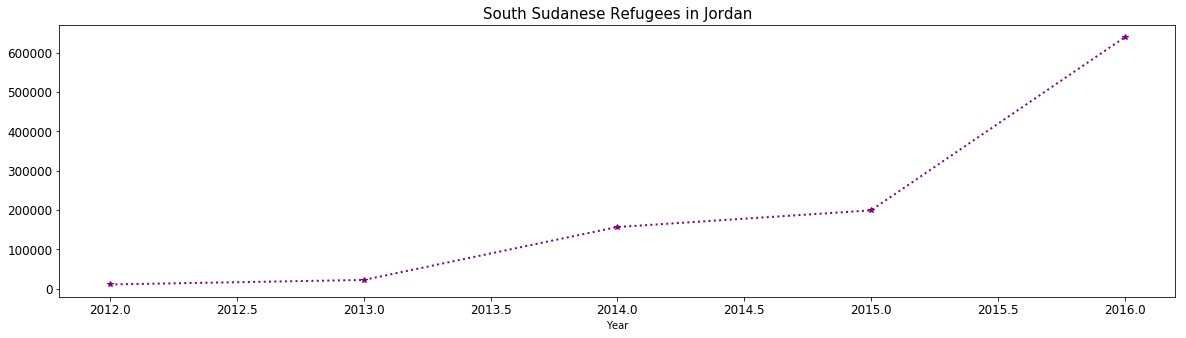

In [131]:
plt.figure(figsize=(20, 5))
South_Sudanese_refugees_in_Uganda_by_year['Refugees'].plot.line (color='purple',marker ='*', linestyle=':', fontsize=12,
                                                        linewidth=2, markersize=6)
plt.title('South Sudanese Refugees in Jordan', fontsize=15)
plt.show()

## CONCLUSION

In conclusion it can be stated that the the war in Afghanistan has significantly impacted countries like Pakistan and Islamic Republic of Iran as both share land border with Afghanistan and therefore refugees from Afghanistan have been the main driver of trend for refugee population in both the countries. However a more detailed analysis needs to be conducted prior to 1999 as there had been a huge influx of Afghan refugees in both the countries during the Soviet Afghan War which lasted from 1979 to 1991. This can provide us a true picture of refugee movements to and fro Afghanistan and how it has impacted neighbouring countries. 

For Turkey and Lebanon the main driver of refugee population has been the Syrian conflict since 2011. As a result today Turkey has the highest no of Syrian Refugees in the world. While Uganda has been affected by the conflict in South Sudan. The present research is only focused on refugee populations in the affected countries. However in order to gauge a true impact of these conflicts we would need to study the economic impact of such conflicts affecting people living in these countries and their local economies.